## 영화 관객수 예측 모델 개발 (연습)

1. movies_train.csv / movies_test.csv
title : 영화의 제목
distributor : 배급사
genre : 장르
release_time : 개봉일
time : 상영시간(분)
screening_rat : 상영등급
director : 감독이름
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
num_staff : 스텝수
num_actor : 주연배우수
box_off_num : 관객수


2.  submission.csv (제출 파일 형식)

데이터 상세 설명
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터

** y : 영화 관객수

## EDA

In [1]:
from IPython.display import Image 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
movie_train = pd.read_csv("C:/Users/user/Documents/python/data/Dacon/movie/movies_train.csv", encoding = "utf8")
movie_test = pd.read_csv("C:/Users/user/Documents/python/data/Dacon/movie/movies_test.csv", encoding = "utf8")
movie_sub = pd.read_csv("C:/Users/user/Documents/python/data/Dacon/movie/submission.csv", encoding = "utf8")

In [4]:
print(movie_train.shape)
print(movie_test.shape)
print(movie_sub.shape)

(600, 12)
(243, 11)
(243, 2)


In [5]:
movie_sub.tail()

,title,box_off_num
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0
242,조선안방 스캔들-칠거지악 2,0


#### null 값 확인 
- 이전 영화 관객 수 330개 null

In [6]:
movie_train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [7]:
movie_train[movie_train["dir_prev_bfnum"].isnull()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


이전 영화의 관객 수를 모르는 영화는 이전 제작에 참여한 영화의 개수도 0으로 처리 되었다.

#### data type

In [8]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


#### 시각화

In [9]:
movie_train["x"] = 0
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,x
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,0


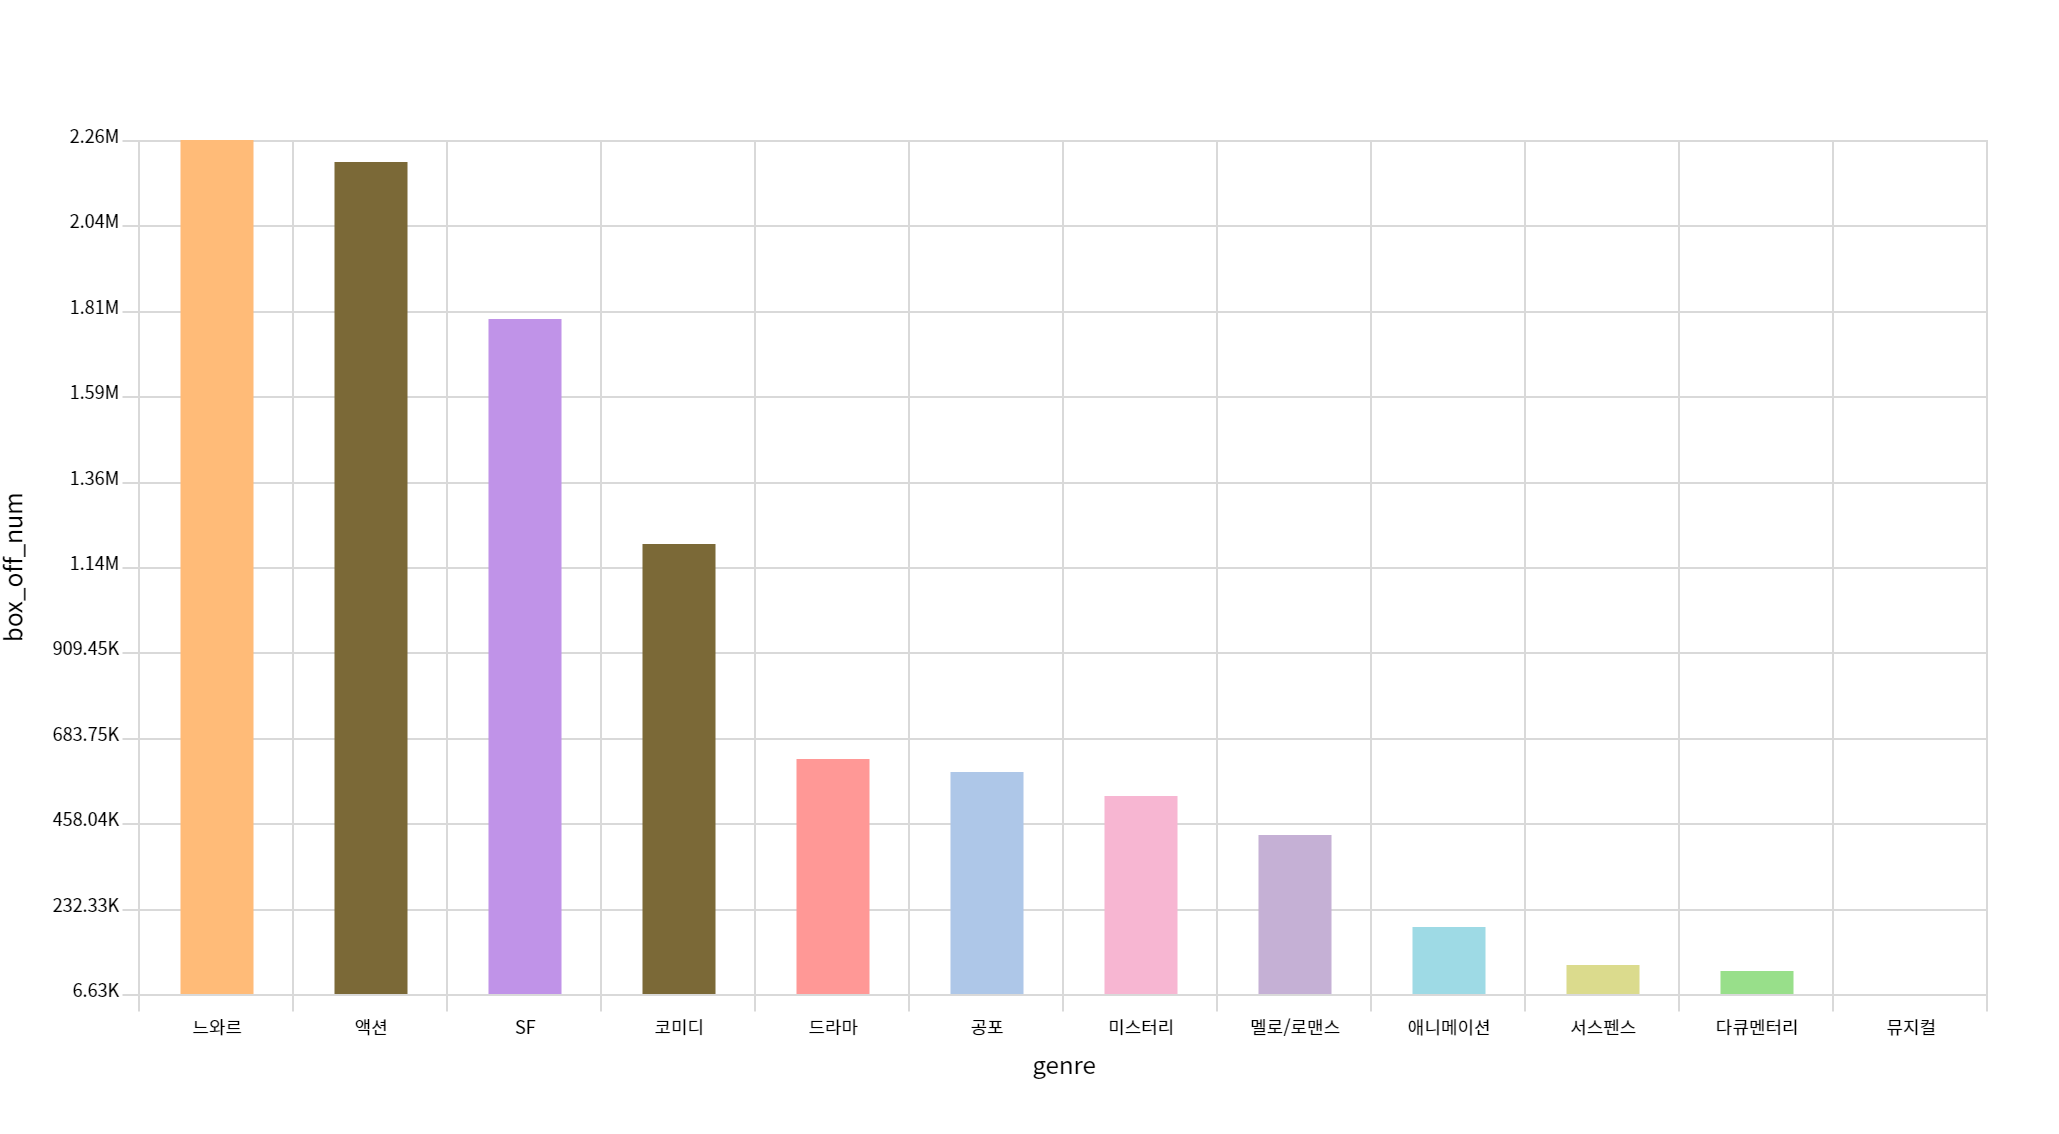

In [10]:
Image("C:/Users/user/Pictures/Camera Roll/movie1.png") # code안에서 나오게 할 때

느와르, 액션 등의 관객 수가 많은 것을 알 수 있고, 로맨스나 애니메이션의 관객 수는 크게 많지 않은 것을 알 수 있다.

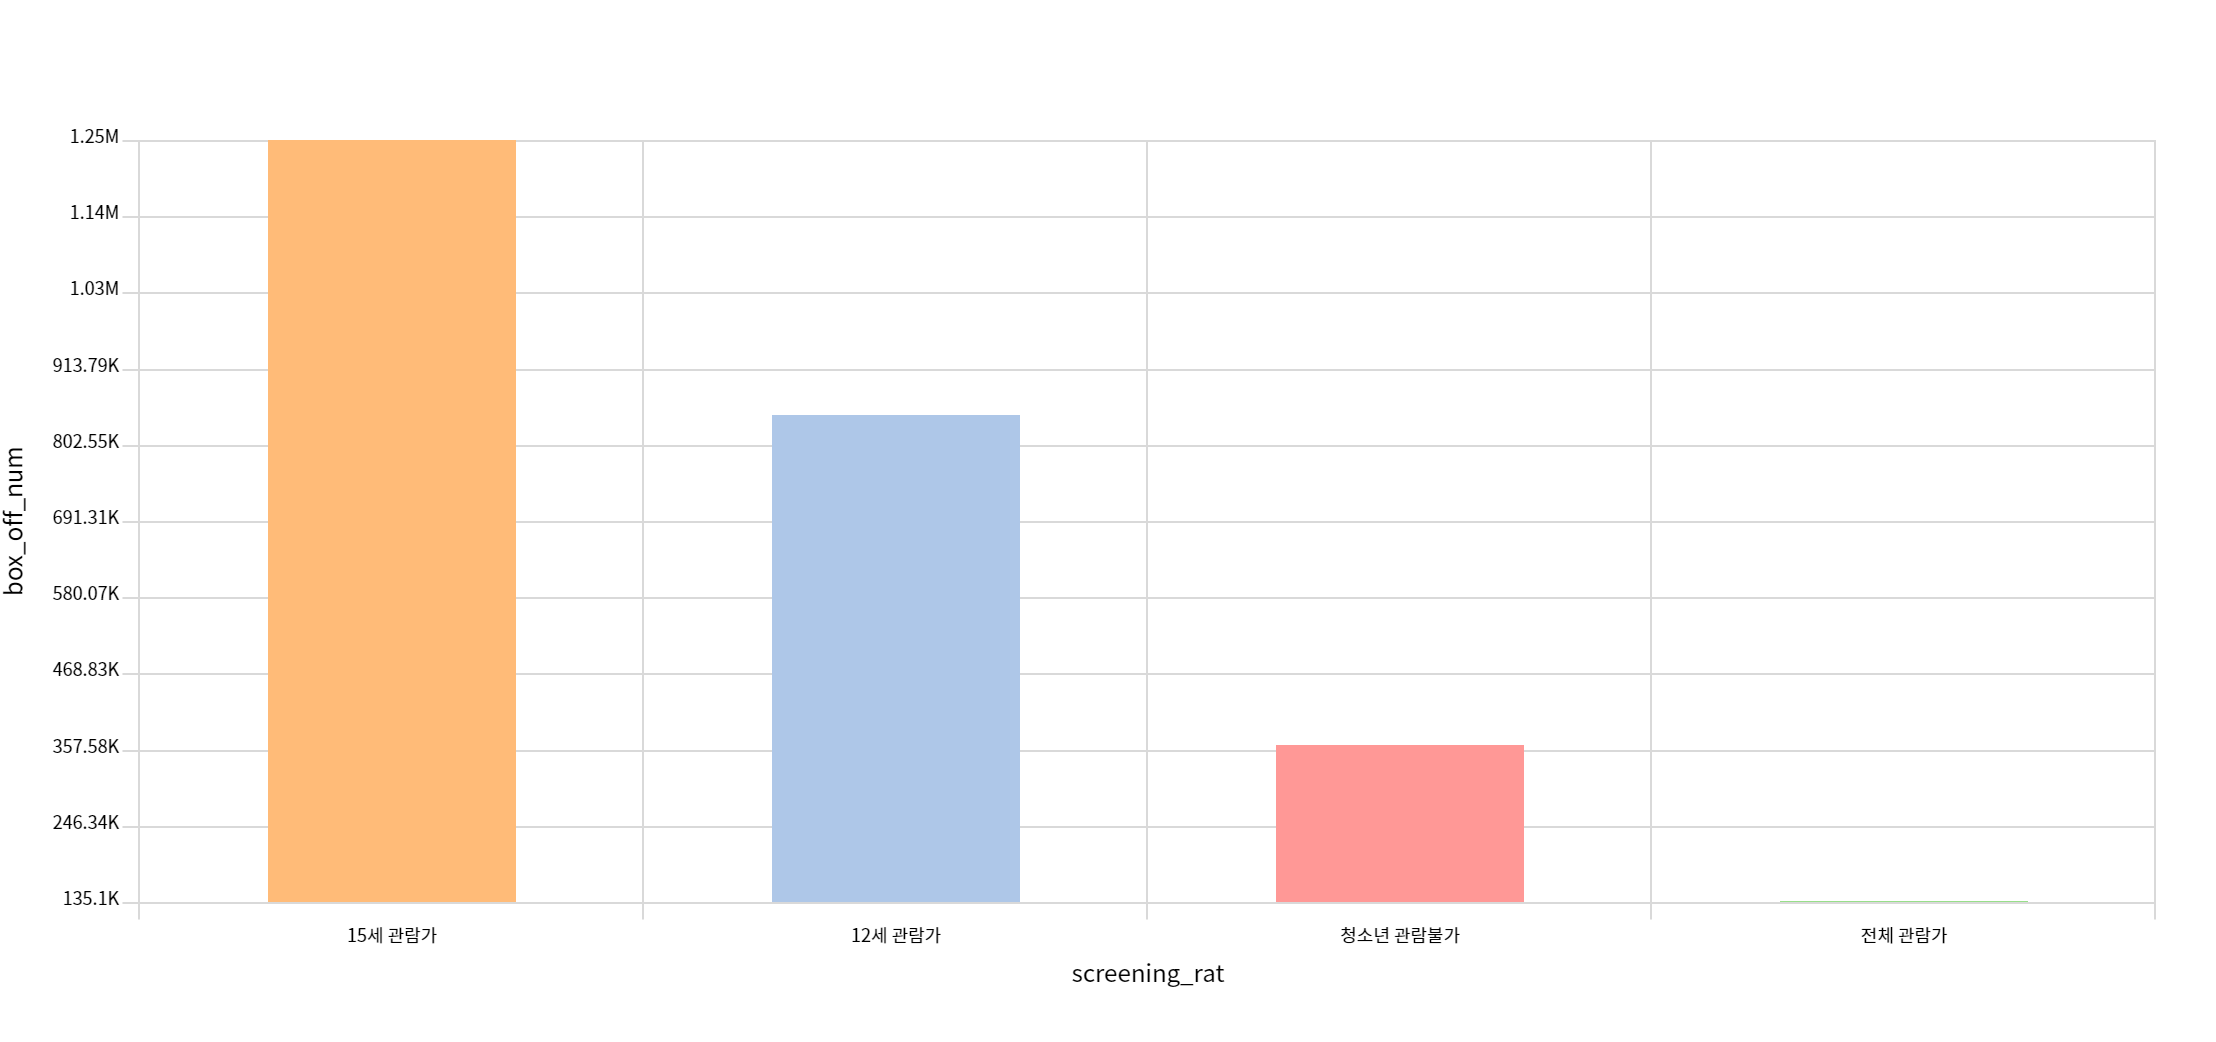

In [11]:
Image("C:/Users/user/Pictures/Camera Roll/movie2.png") # code안에서 나오게 할 때

15세 관람가의 영화의 관객 수가 다른 관람가보다 많은 것을 알 수 있다.

In [12]:
movie_train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,x
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,NaN
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,NaN
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,NaN
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,NaN
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,NaN
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,NaN
x,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 시간과 관객수 : 0.44
- 시간과 staff 수 : 0.62
- staff 수와 관객 수 : 0.54

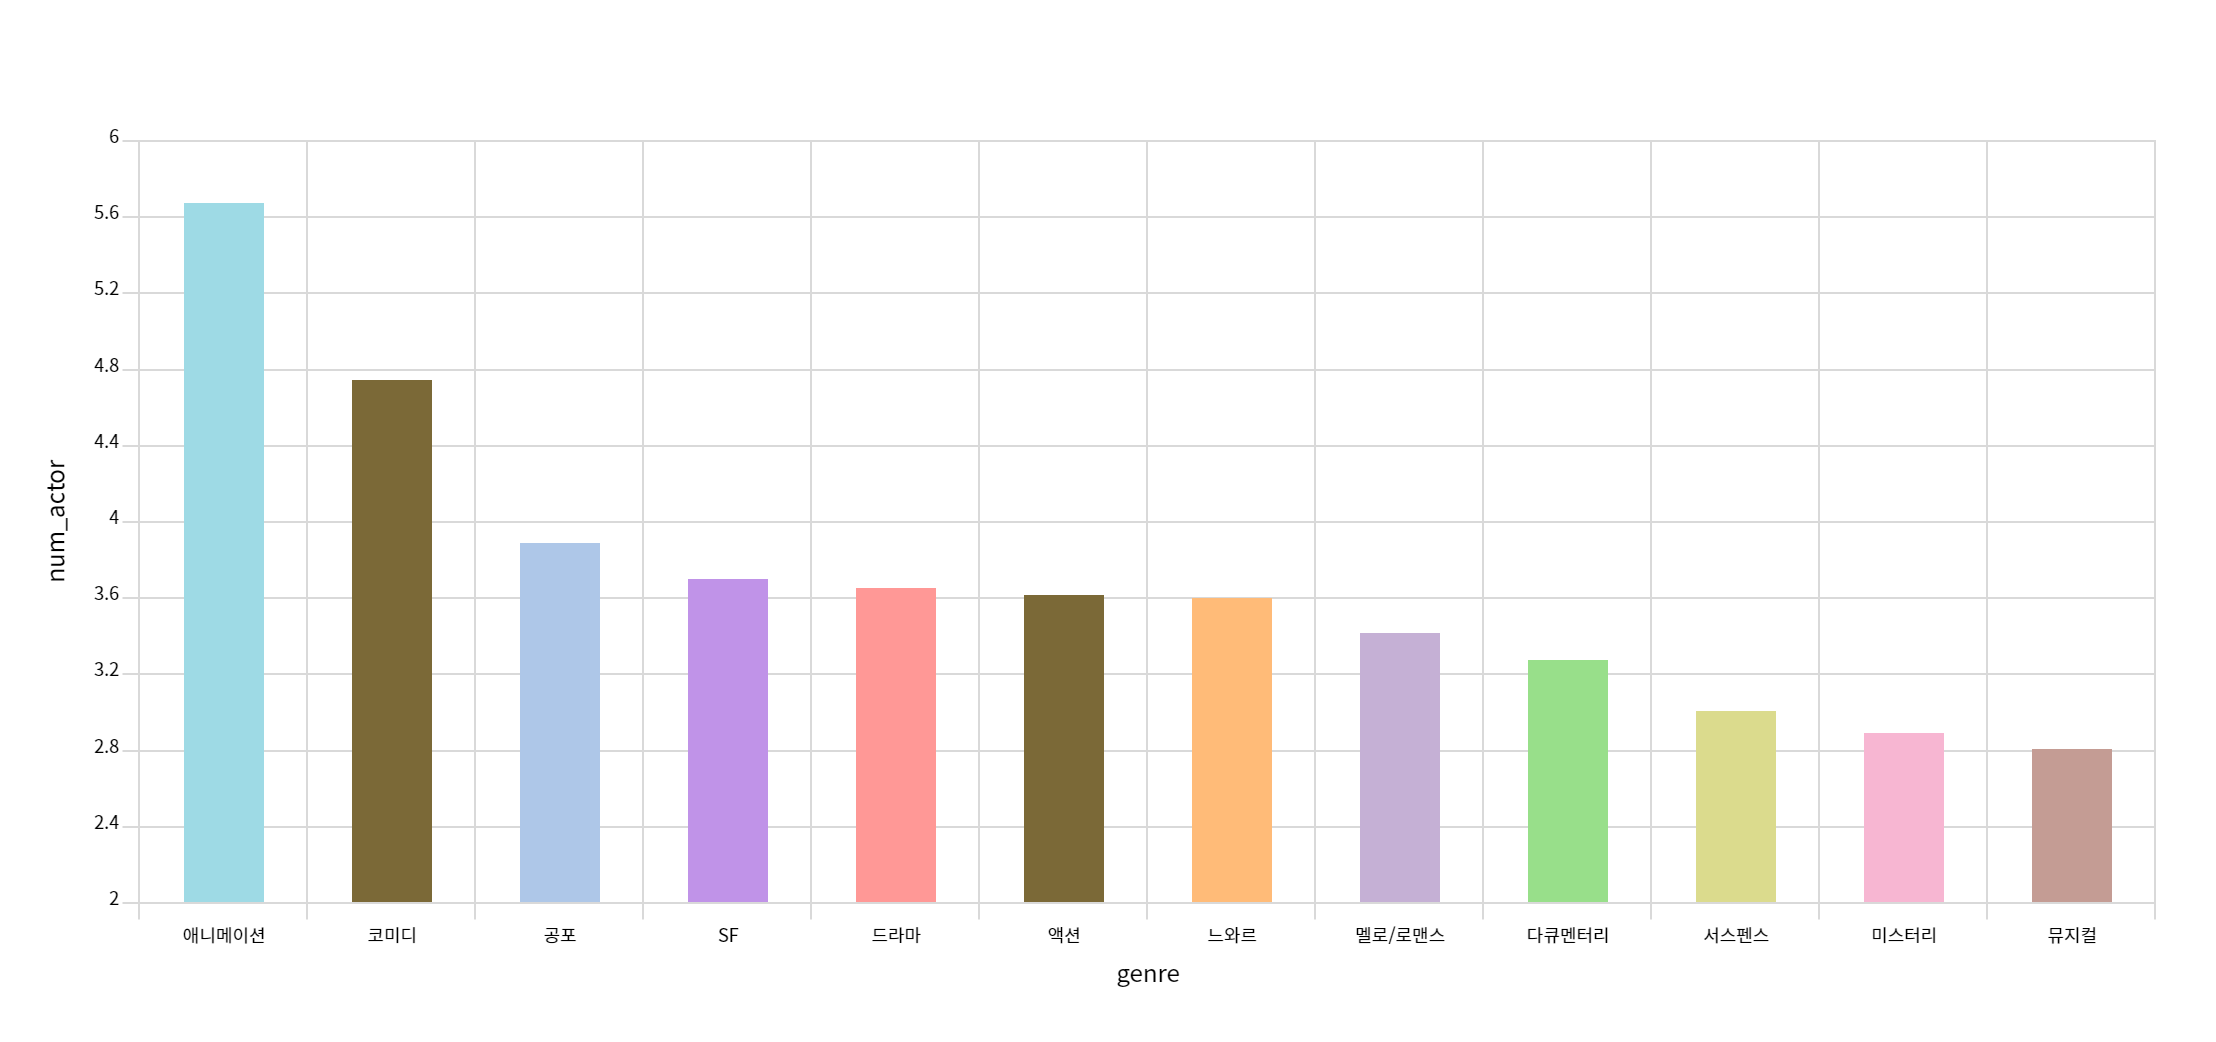

In [13]:
Image("C:/Users/user/Pictures/Camera Roll/movie3.png") # code안에서 나오게 할 때

배우 수를 확인해봤더니, 애니메이션에 많은 배우가 나온 것을 알 수 있고, 그 다음은 코미디였다. 액션, 느와르는 많은 편은 아니었다. 
(배우가 더 많이 출연한다고 관객 수가 더 많은 것은 아니었다.)

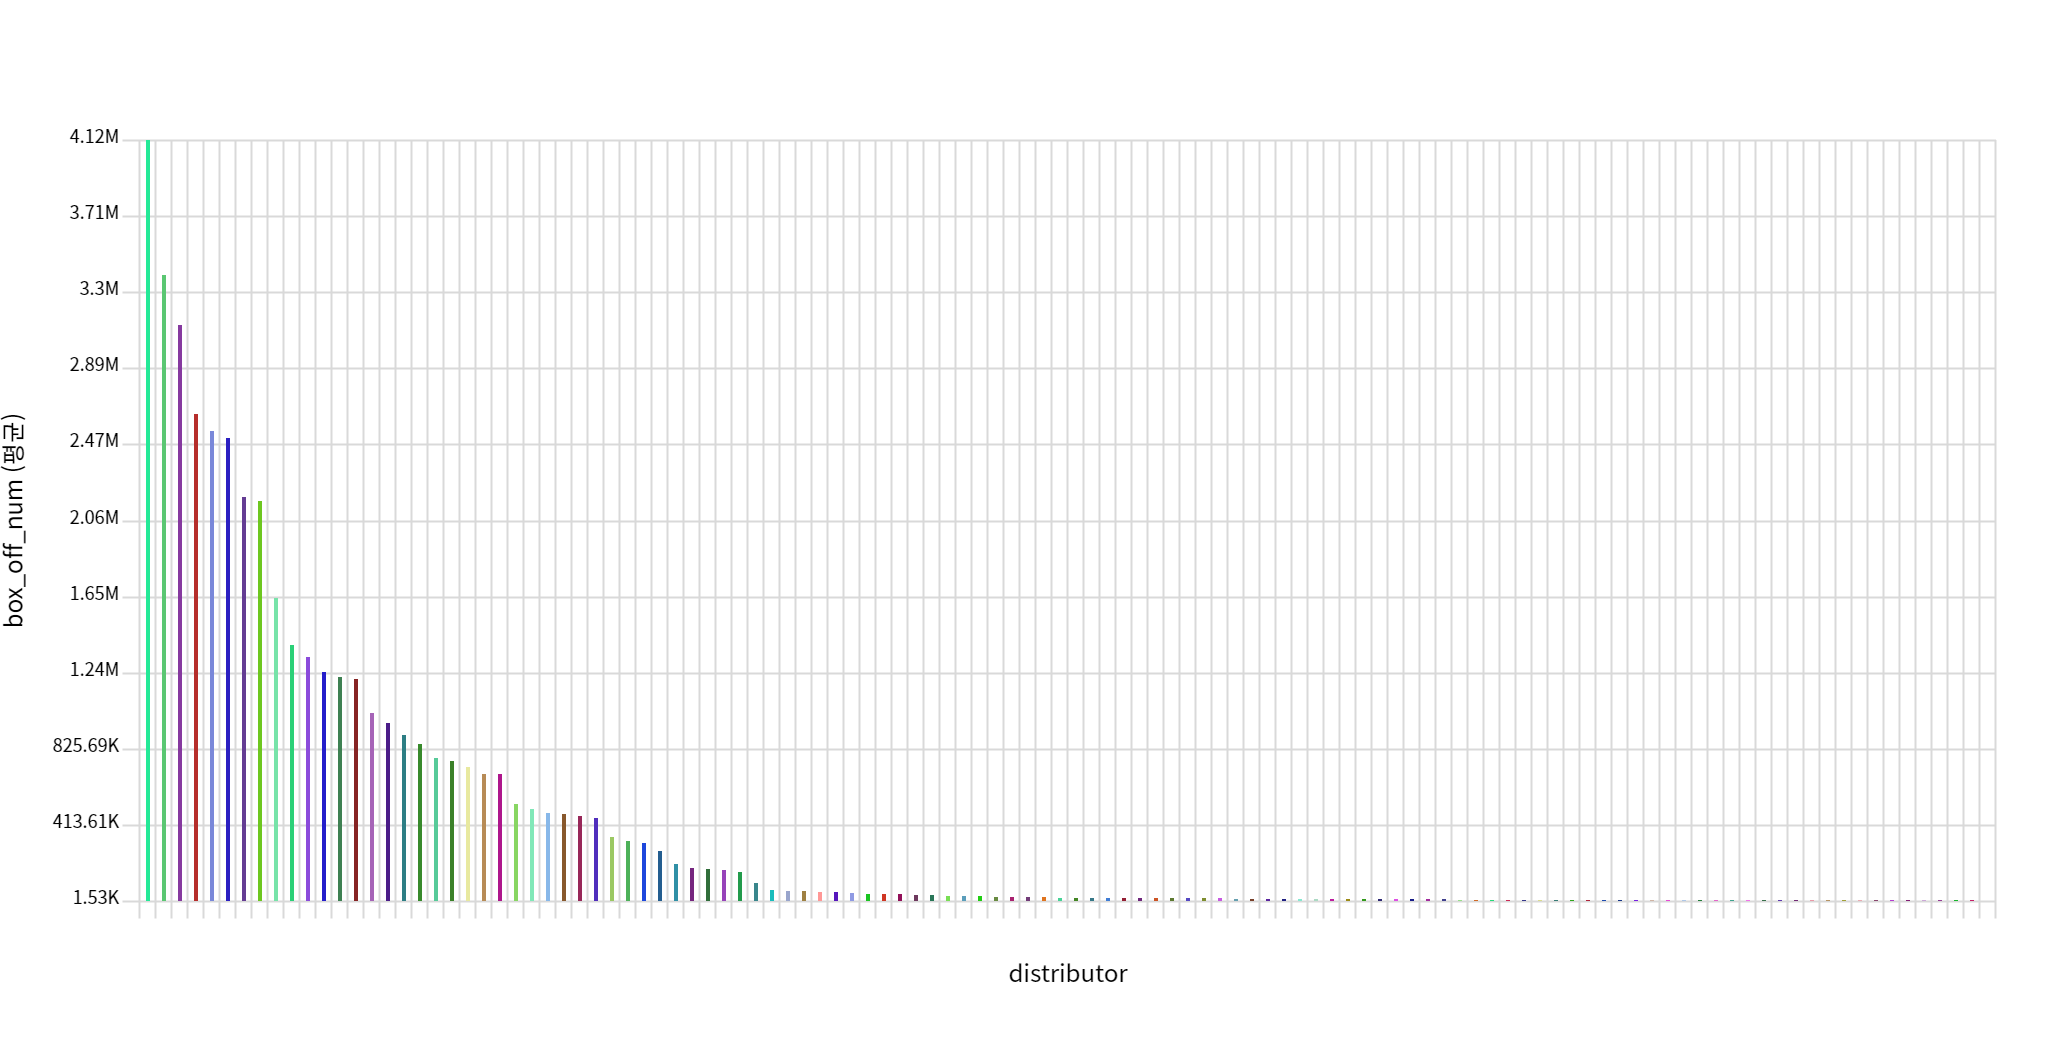

In [14]:
Image("C:/Users/user/Pictures/Camera Roll/movie4.png") # code안에서 나오게 할 때

제작사 별로 관객 수 평균을 확인해 봤을 때, CJ E&M pictures, 쇼박스, 아이필름코퍼레이션, 미디어 플렉스 등 순으로 많았다.

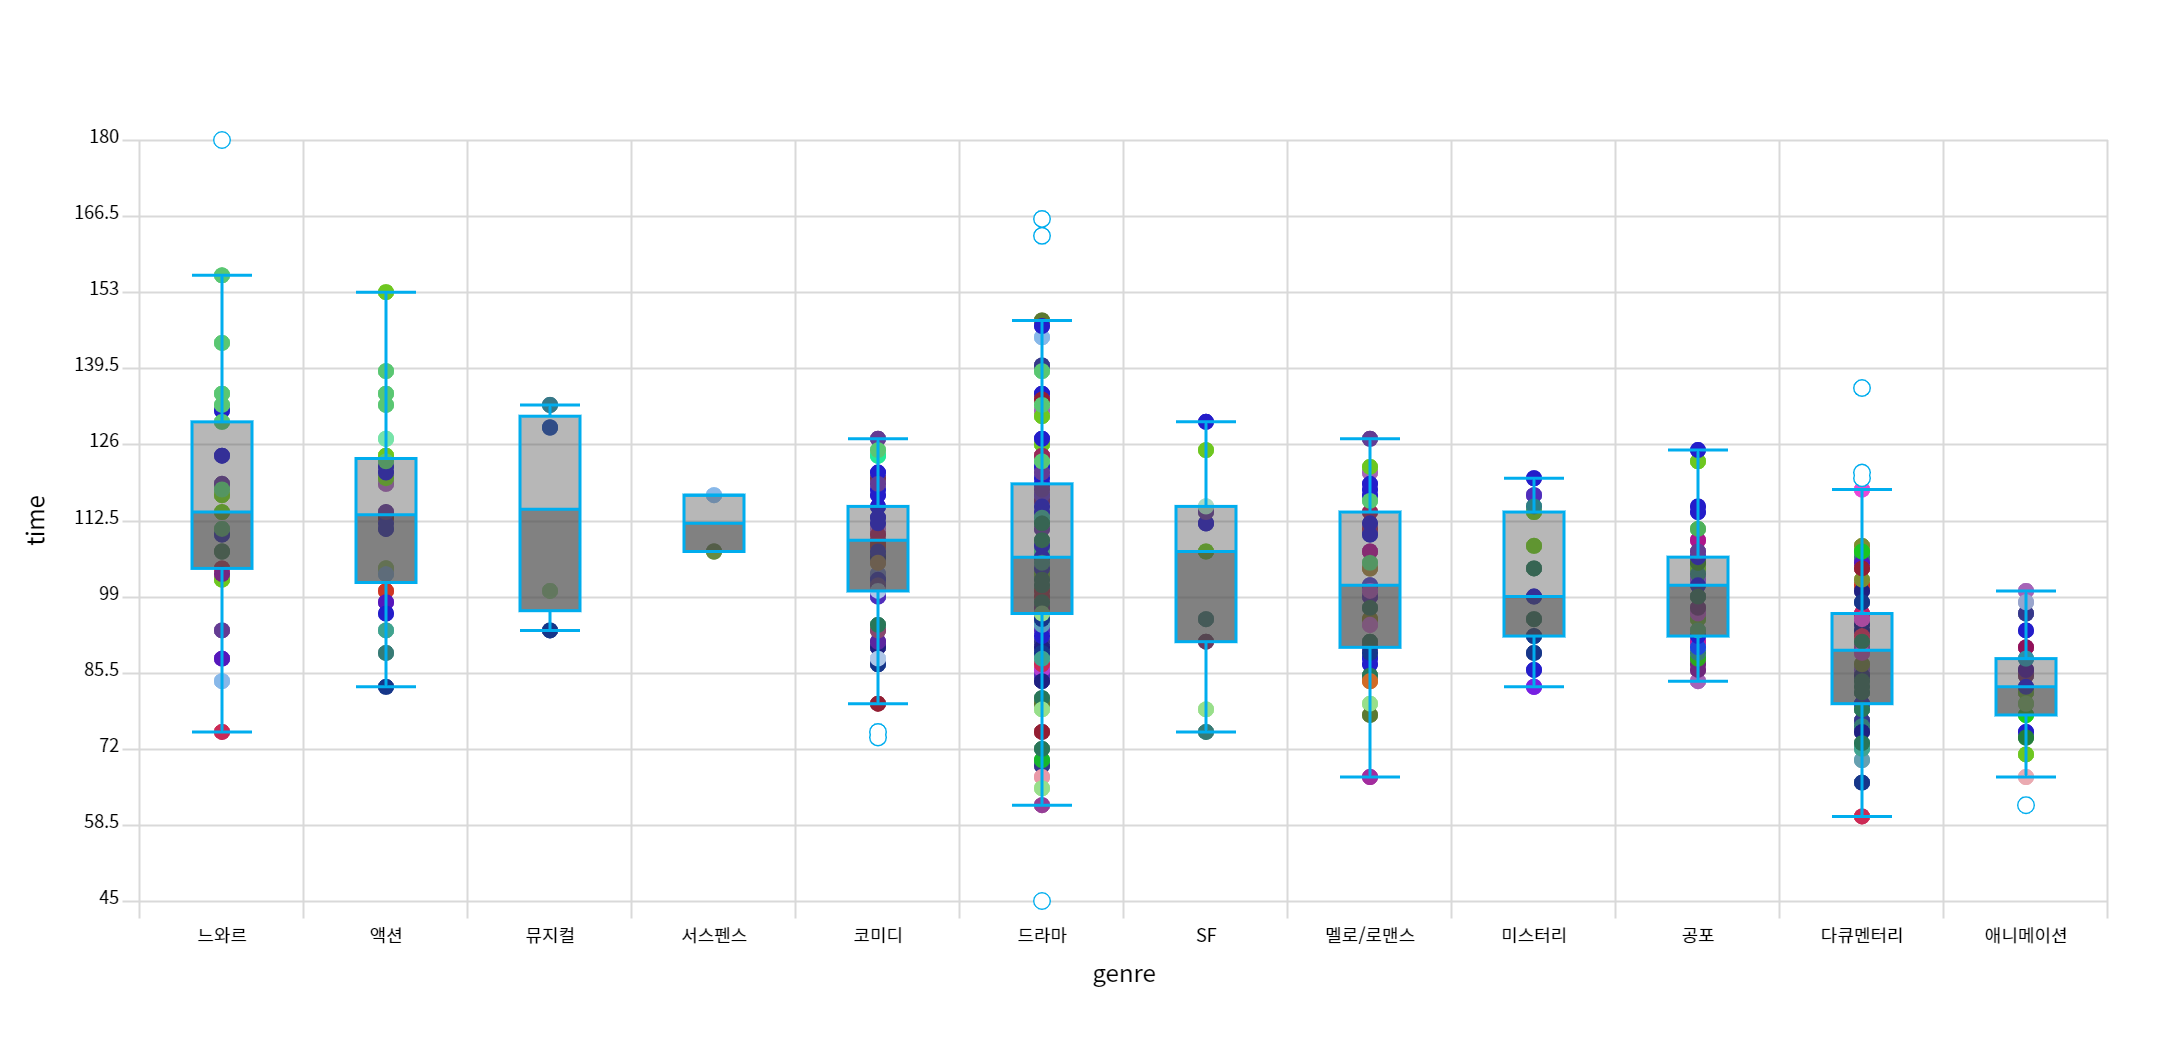

In [15]:
Image("C:/Users/user/Pictures/Camera Roll/movie5.png") # code안에서 나오게 할 때

- 평균 시간을 확인해 봤을 때, 느와르가 가장 상영시간이 길었고, 그 다음은 액션이 길었다. 반면에 애니메이션의 평균 반영시간이 가장 짧았다.
- 대체적으로 이상값이 존재하지 않는 것을 알 수 있다.

## 모델링

LightGBM 모델
- 부스팅 모델
- 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나감
- 타 부스팅 모델에 비해 속도가 빠름

In [16]:
import sklearn 
import lightgbm as lgb
from sklearn.model_selection import train_test_split

1. 모델 만들기

In [17]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

In [18]:
features = ["genre", "screening_rat", "num_staff", "num_actor"]
target = ["box_off_num"]

In [19]:
movie_test
movie_train[features]

,genre,screening_rat,num_staff,num_actor
0,액션,청소년 관람불가,91,2
1,느와르,청소년 관람불가,387,3
2,액션,15세 관람가,343,4
3,코미디,전체 관람가,20,6
4,코미디,15세 관람가,251,2
...,...,...,...,...
595,드라마,청소년 관람불가,510,7
596,드라마,15세 관람가,286,6
597,공포,청소년 관람불가,123,4
598,느와르,15세 관람가,431,4


2. train, test set 나누기
- 범주형 처리

In [20]:
# 범주형을 수치형을 바꾸기 1 
movie_train['genre']=movie_train['genre'].factorize()[0]
movie_train['screening_rat']=movie_train['screening_rat'].factorize()[0]

movie_test['genre']=movie_test['genre'].factorize()[0]
movie_test['screening_rat']=movie_test['screening_rat'].factorize()[0]

movie_train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,x
0,개들의 전쟁,롯데엔터테인먼트,0,2012-11-22,96,0,조병옥,NaN,0,91,2,23398,0
1,내부자들,(주)쇼박스,1,2015-11-19,130,0,우민호,1161602.50,2,387,3,7072501,0
2,은밀하게 위대하게,(주)쇼박스,0,2013-06-05,123,1,장철수,220775.25,4,343,4,6959083,0
3,나는 공무원이다,(주)NEW,2,2012-07-12,101,2,구자홍,23894.00,2,20,6,217866,0
4,불량남녀,쇼박스(주)미디어플렉스,2,2010-11-04,108,1,신근호,1.00,1,251,2,483387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,5,2014-08-13,111,0,심성보,3833.00,1,510,7,1475091,0
596,파파로티,(주)쇼박스,5,2013-03-14,127,1,윤종찬,496061.00,1,286,6,1716438,0
597,살인의 강,(주)마운틴픽쳐스,7,2010-09-30,99,0,김대현,NaN,0,123,4,2475,0
598,악의 연대기,CJ 엔터테인먼트,1,2015-05-14,102,1,백운학,NaN,0,431,4,2192525,0


In [21]:
x_train, x_test, y_train = movie_train[features],movie_test[features],movie_train[target]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(600, 4)
(243, 4)
(600, 1)


3. model fit

In [22]:
model.fit(x_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

4. predict
- 예측값이 - 인 것을 보아 모델의 성능이 안 좋아 보인다. . .

In [23]:
pre_value = model.predict(x_test)  
len(pre_value)

243

In [24]:
movie_sub["box_off_num"] = pre_value

In [25]:
movie_sub

,title,box_off_num
0,용서는 없다,4.789775e+05
1,아빠가 여자를 좋아해,-6.107675e+05
2,하모니,1.428461e+06
3,의형제,6.470348e+05
4,평행 이론,1.753081e+06
...,...,...
238,해에게서 소년에게,6.438228e+04
239,울보 권투부,-4.223931e+04
240,어떤살인,-9.568583e+04
241,말하지 못한 비밀,3.409396e+05


confusion matrix
- 이건 y_test가 없어서 정확도를 확인할 수가 없음

#### 교차검증

K-fold 교차검증
- 과대적합 방지
- 모델 간 일반적인 성능 비교
- validation set, development set

In [26]:
from sklearn.model_selection import KFold

In [27]:
movie_train.head(4)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,x
0,개들의 전쟁,롯데엔터테인먼트,0,2012-11-22,96,0,조병옥,NaN,0,91,2,23398,0
1,내부자들,(주)쇼박스,1,2015-11-19,130,0,우민호,1161602.50,2,387,3,7072501,0
2,은밀하게 위대하게,(주)쇼박스,0,2013-06-05,123,1,장철수,220775.25,4,343,4,6959083,0
3,나는 공무원이다,(주)NEW,2,2012-07-12,101,2,구자홍,23894.00,2,20,6,217866,0


랜덤으로 섞어주기 (단, 시간 속성이 중요한 시계열데이터는 shuffling 안 해줌)

In [28]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

In [29]:
k_fold

KFold(n_splits=5, random_state=777, shuffle=True)

- model 다시 초기화
- 모델 5개를 만들어줄 것이므로 모델 담을 리스트 만들기

In [30]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

models = []

for train_idx, val_idx in k_fold.split(x_train):
    #print(train_idx)
    x_t = x_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = x_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.75118e+12
[100]	valid_0's l2: 4.69275e+12
[100]	valid_0's l2: 2.54211e+12
[200]	valid_0's l2: 2.58608e+12
[100]	valid_0's l2: 1.77916e+12
[100]	valid_0's l2: 2.15235e+12


In [31]:
models

pred = []
for model in models:
    pred.append(model.predict(x_test))
    
len(pred)

5

In [32]:
movie_sub["box_off_num"] = np.mean(pred, axis = 0)
movie_sub.head(3)

,title,box_off_num
0,용서는 없다,2.066095e+06
1,아빠가 여자를 좋아해,1.041928e+06
2,하모니,2.136626e+06


In [34]:
movie_sub.to_csv("C:/Users/user/Documents/python/data/Dacon/movie/제출용.csv", encoding = "cp949")